# Assignment 3 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [1]:
# Task 1 
# Generate sample data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=0.4,random_state=0)

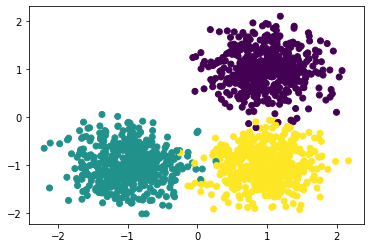

In [2]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.savefig('Task1Data.png')

In [3]:
# Task 2 
import numpy as np
rawdata=np.loadtxt('semeion.data');
x=rawdata[:,0:256].copy()
t=rawdata[:,-10:rawdata.shape[1]].copy()
del(rawdata)
t=np.sign(t-.5)

In [4]:
X.shape[1]

2

In [7]:
def Kmeans_c(clusters, iterations, X):
    """ 
        The function takes in 3 inputs
        clusters: Number of clusters to be clustered on. 
        iterations: The number of iterations to choose the best model
        X: The data to be clustered
        
    """
    km = []
    models = []
    for i in range(iterations+1):
        centroids = np.random.rand(clusters,X.shape[1])
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=clusters, random_state=0, init = centroids, n_init=1).fit(X)
        km.append(kmeans.inertia_)
        models.append(kmeans)
    
    min_in = min(km)
    low_iner_mod = models[km.index(min_in)]
    
    print("Inertia for the models")
    print(km)
    print()
    
    print("Min Inertia")
    print(min_in)
    
    print()
    print("Low Inertia model")
    print(low_iner_mod)
    
    return low_iner_mod 
        
best_model = Kmeans_c(6, 10, X)

Inertia for the models
[314.2610142087659, 312.30344436336327, 310.41400460085885, 312.24269286751866, 312.1341041469548, 346.9798491855983, 312.12704813135036, 312.14060839758463, 311.65483714940325, 311.3428815803687, 311.3391568359371]

Min Inertia
310.41400460085885

Low Inertia model
KMeans(init=array([[0.52708664, 0.24729565],
       [0.90712692, 0.64323146],
       [0.73903763, 0.36782822],
       [0.15839324, 0.32588203],
       [0.70174552, 0.20014283],
       [0.90459745, 0.62493026]]),
       n_clusters=6, n_init=1, random_state=0)


In [9]:
def d_model(km,y):
    
    """ 
             Takes in two variables 
             trained k_means model 
             y: as a numpy array for the target
             prints the class distribution of the model 
    """
    blabs = np.unique(km.labels_)
    for i in blabs:
        distribution = y[km.labels_==i]
        count = np.unique(distribution, return_counts=True)
        print("Cluster :",i, "Class count :",count)

d_model(best_model,y)       

Cluster : 0 Class count : (array([1, 2]), array([ 11, 211]))
Cluster : 1 Class count : (array([0]), array([147]))
Cluster : 2 Class count : (array([0, 2]), array([194,   2]))
Cluster : 3 Class count : (array([1, 2]), array([489,   1]))
Cluster : 4 Class count : (array([0, 2]), array([  3, 286]))
Cluster : 5 Class count : (array([0]), array([156]))


In [10]:
# Distortion 
best_model.inertia_

310.41400460085885

In [11]:
# Number of clusters
best_model.cluster_centers_

array([[ 0.5798593 , -1.05170938],
       [ 0.94941137,  1.43475702],
       [ 0.67384365,  0.77544128],
       [-1.01132251, -1.00011581],
       [ 1.23616061, -0.97127837],
       [ 1.37770529,  0.84496446]])

In [12]:
# Number of iterations 
best_model.n_iter_

16

In [13]:
# Predictions 
predict = best_model.predict(X)
predict

array([3, 4, 3, ..., 2, 3, 1], dtype=int32)

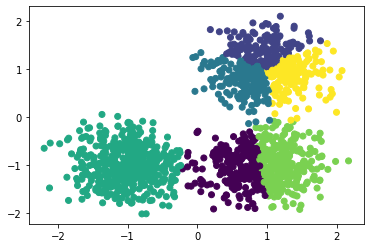

In [15]:
# Plot the predictions
plt.scatter(X[:,0],X[:,1], c=predict)
plt.savefig('KmeansTest.png')

In [21]:
#cluster_membership = np.argmax(u, ax
def fcmeans(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    print("Centers")
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X[:,0], X[:,1])
    axes[1].scatter(X[:,0], X[:,1], c=pred)
    axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    plt.savefig('FCMeans.png')
    plt.title("Fuzzy Cmeans")
    plt.show()
    return centers, pred

In [22]:
#cluster_membership = np.argmax(u, ax
def fcmeans2(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    #print("Centers")
    #f, axes = plt.subplots(1, 2, figsize=(11,5))
    #axes[0].scatter(X[:,0], X[:,1])
    #axes[1].scatter(X[:,0], X[:,1], c=pred)
    #axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    #plt.show()
    return centers, pred

Centers


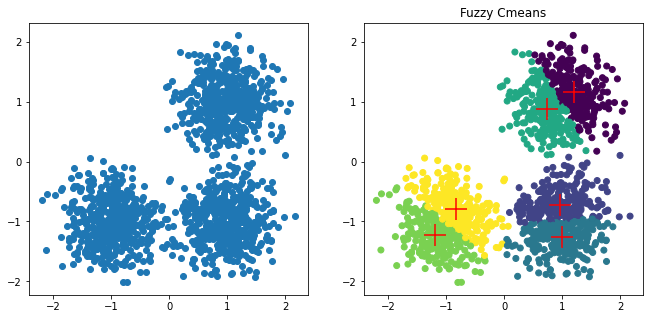

In [23]:
test = fcmeans(X,6)

In [24]:
#np.unique(test[1])
def d_fcmeans(labels,y):
    """ 
        Takes in a numpy array of labels. 
        Prints out the distribution of the clusters.
        Takes in y as numpy array of targets.
        
    """
    blabs = np.unique(labels[1])
    for i in blabs:
        distribution = y[labels[1]==i]
        count = np.unique(distribution, return_counts=True)
        print("Cluster :",i, "Class count :",count)
d_fcmeans(test,y)      

Cluster : 0 Class count : (array([0]), array([235]))
Cluster : 1 Class count : (array([0, 1, 2]), array([  8,   1, 237]))
Cluster : 2 Class count : (array([1, 2]), array([  1, 258]))
Cluster : 3 Class count : (array([0]), array([257]))
Cluster : 4 Class count : (array([1]), array([237]))
Cluster : 5 Class count : (array([1, 2]), array([261,   5]))


For i  1
Centers


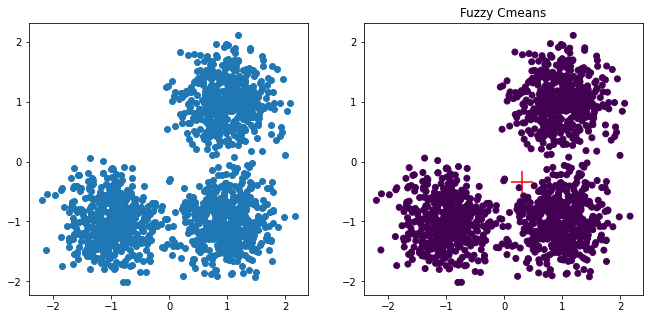

For i  2
Centers


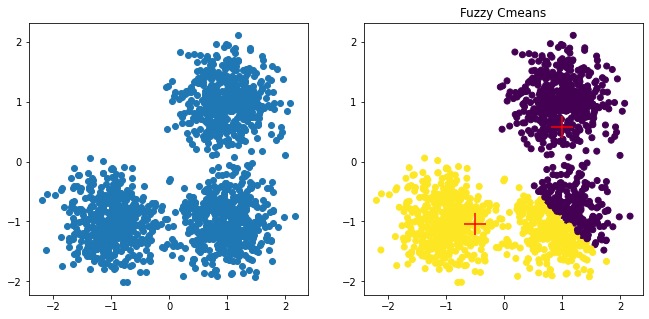

For i  3
Centers


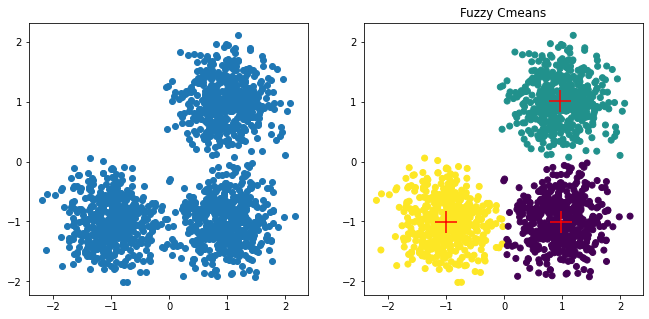

For i  4
Centers


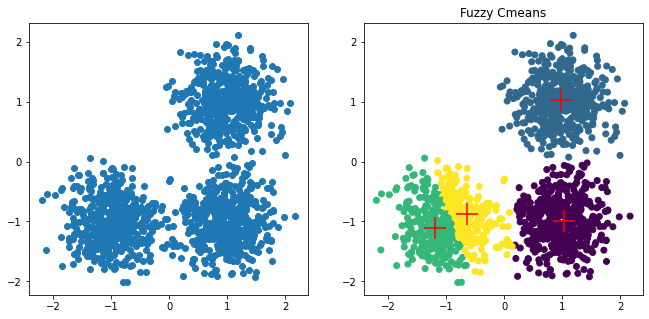

For i  5
Centers


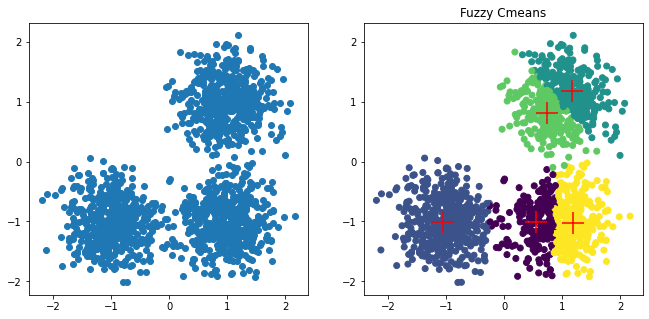

In [25]:
#Trying the algorithm out on different clusters 
for i in range(5):
    print("For i ", i+1)
    fcmeans(X,i+1)
 

In [26]:
def PossiblisticC(data, nclusters,centroids, iterations):
    """ This function takes in 4 variables 
        data : This is the data to be clustered as a numpy array.
        nclusters: The number of clusters as an int
        centroids: The initial centers as numpy array
        iterations: The max iteration as an int """
    
    from skcmeans.algorithms import Possibilistic
    clusters = Possibilistic(n_clusters=nclusters, n_init=5, max_iter=iterations)
    fitd = clusters.fit(data)
    membership = fitd.calculate_memberships(data)
    centers = fitd.calculate_centers(data)
    #print(centers)
    
    return membership, centers

In [29]:
def use_posbc(itera,clusters,data):
    """ This function takes in 2 variables 
        itera: Number of iterations as an int
        clusters: As an int 
        returns an array of labels from the iteratations 
    """
    labels = []
    centers = []
    for i in range(itera):
        initC = np.random.rand(clusters,2)*10
        membership = PossiblisticC(data,clusters,initC,5)
        plabels = np.argmax(membership[0], axis=1)
        centers.append(membership[1])
        labels.append(plabels)
    return labels,centers
    
labs = use_posbc(6,6,X)

In [30]:
def d_possbl(labels,y):
    """ 
        Takes in a numpy array of labels. 
        Prints out the distribution of the clusters.
        Takes in y as numpy array of targets.
        
    """
    blabs = np.unique(labels[0][1])
    for i in blabs:
        distribution = y[labels[0][1]==i]
        count = np.unique(distribution, return_counts=True)
        print("Class :",i, "Count :",count)
        
d_possbl(labs,y)

Class : 0 Count : (array([2]), array([374]))
Class : 1 Count : (array([1, 2]), array([499,  13]))
Class : 2 Count : (array([0, 2]), array([ 3, 24]))
Class : 3 Count : (array([0]), array([474]))
Class : 4 Count : (array([0]), array([23]))
Class : 5 Count : (array([1, 2]), array([ 1, 89]))


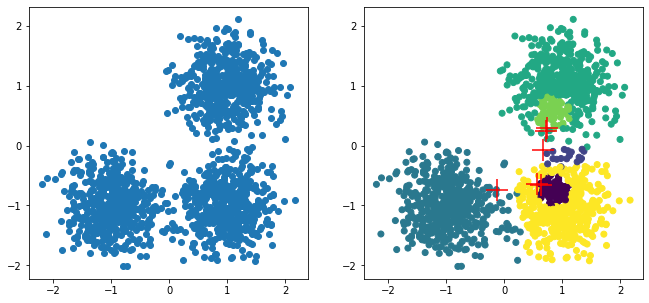

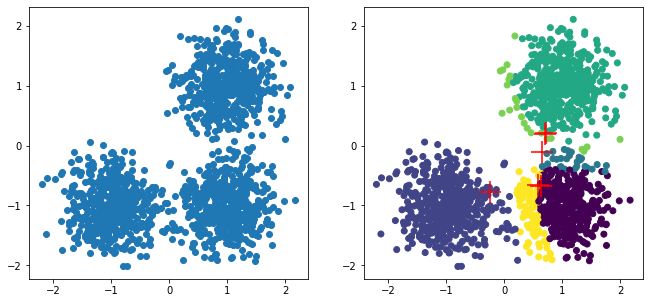

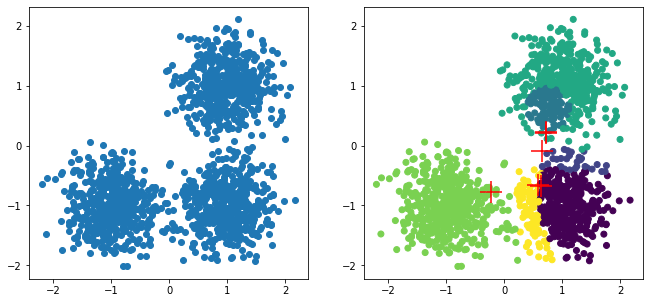

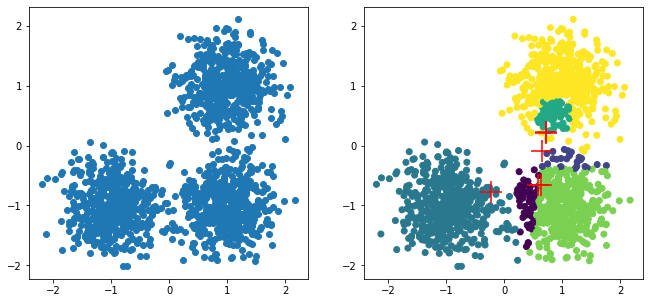

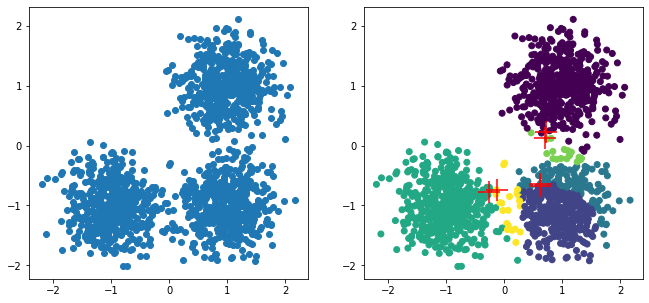

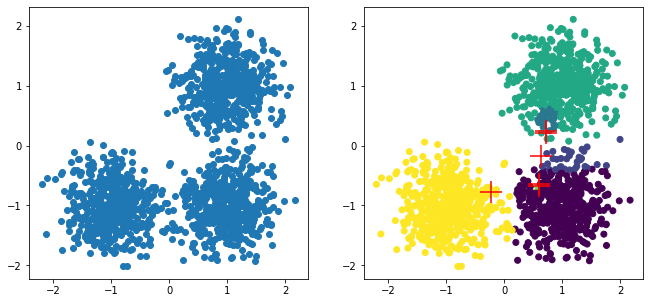

In [32]:
# Plot the output from the  5 iterations 
def plot_it(data,labels):
    """
      This takes in 2 variables. 
      data - This is a numpy array
      labels - This is a tuple of results from use_posbc()
    """
    for i, j in zip(labels[0],labels[1]):
        f, axes = plt.subplots(1, 2, figsize=(11,5))
        axes[0].scatter(data[:,0], data[:,1])
        axes[1].scatter(data[:,0], data[:,1], c=i)
        axes[1].scatter(j[:,0], j[:,1], marker="+", s=500, c='r')
    plt.savefig("Possiblictic.png")
        
plot_it(X,labs)

In [33]:
 #np.any([[True, False], [False, False]], where=[[False], [True]])
            
            #if(np.where(labs[0][i]==i) not in indices):
               # indices.append(np.where(labs[0][i]==i))

## Task 4

In [34]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(x)
reduced_data.shape

(1593, 2)

## Possiblistic Cmeans

In [35]:
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [36]:
type(data)

numpy.ndarray

In [37]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)
class_labels = use_posbc(5,5,reduced_data)

In [38]:
#lbs = best_modelt.labels_
tcat = np.argmax(t, axis = 1) # Convert all the columns to one categorical column
#lbs.shape
np.unique(tcat)

clebs = use_posbc(10,10,x) 
#Distribution of class labels 
d_possbl(clebs,tcat)

Class : 6 Count : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([161, 162, 159, 159, 161, 159, 161, 158, 155, 158]))


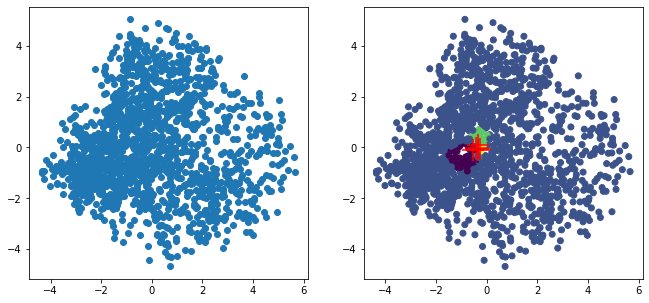

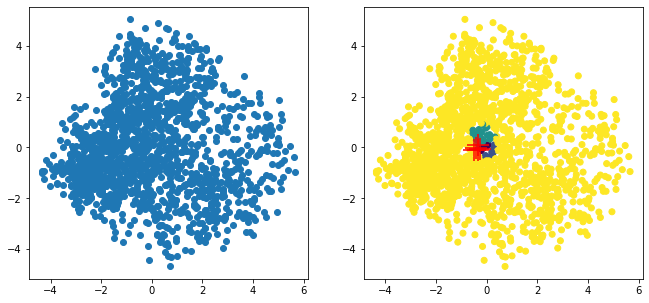

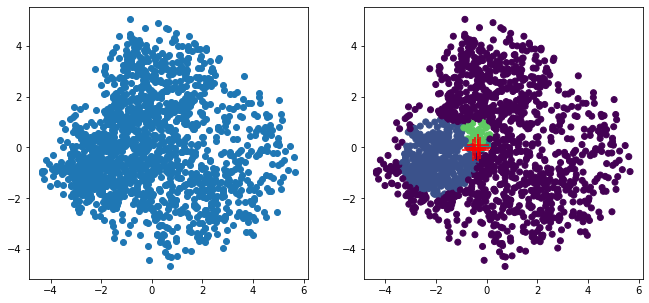

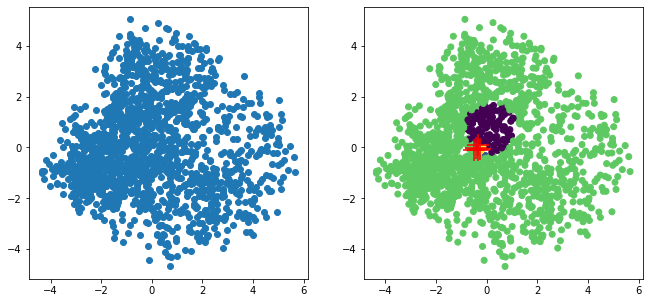

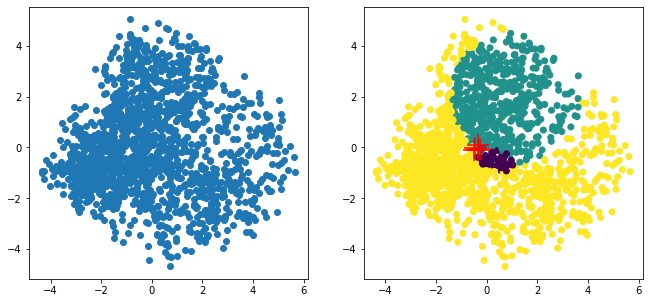

In [39]:
#class_labels for the handritting data
plot_it(reduced_data,class_labels)

## Cmeans

Centers


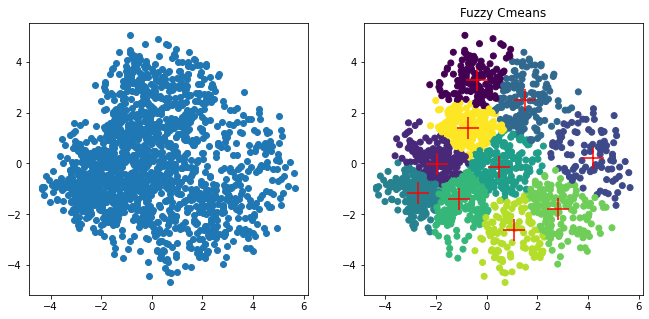

In [40]:
tesC = fcmeans(reduced_data,10) 

In [41]:
#All the data clustering distribution
tesB = fcmeans2(x,10)

In [42]:
d_fcmeans(tesB,tcat) 

Cluster : 0 Class count : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([101,   7,  39,  85,  52, 114,  83,   4,  60,  78]))
Cluster : 1 Class count : (array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([148, 109,  65,  36,  24,  15, 153,  77,  59]))
Cluster : 2 Class count : (array([0, 2, 3, 4, 5, 6, 8]), array([ 8,  2,  3, 16,  2,  2,  2]))
Cluster : 3 Class count : (array([0, 2, 4, 5, 6, 8, 9]), array([5, 2, 2, 5, 2, 4, 6]))
Cluster : 4 Class count : (array([0, 1, 3, 4, 5, 6, 7, 8, 9]), array([1, 6, 2, 3, 2, 3, 1, 5, 4]))
Cluster : 5 Class count : (array([1, 4, 5, 6, 8, 9]), array([1, 9, 3, 1, 1, 3]))
Cluster : 6 Class count : (array([2, 4, 6, 8]), array([1, 2, 2, 3]))
Cluster : 7 Class count : (array([0, 2, 4, 5, 6, 8, 9]), array([46,  2, 36,  8, 53,  3,  6]))
Cluster : 8 Class count : (array([2, 4]), array([1, 5]))
Cluster : 9 Class count : (array([2, 3, 5, 9]), array([3, 4, 1, 2]))


## Kmeans

In [43]:
best_modelt = Kmeans_c(10, 10, x)

Inertia for the models
[66517.58153943332, 66925.40239757429, 67137.95025918448, 66462.12941472924, 66616.01987186483, 66714.11390695155, 66385.49640509322, 66954.58768420563, 66749.96610398595, 67055.27274305445, 67155.05466096816]

Min Inertia
66385.49640509322

Low Inertia model
KMeans(init=array([[0.31395494, 0.08469817, 0.20256454, ..., 0.12477398, 0.17825923,
        0.90806665],
       [0.89316238, 0.50845536, 0.51831935, ..., 0.37285463, 0.47207249,
        0.47307826],
       [0.58074372, 0.01489809, 0.09286175, ..., 0.38389849, 0.17336266,
        0.529409  ],
       ...,
       [0.06479568, 0.55189449, 0.72393583, ..., 0.73531638, 0.67768808,
        0.78389941],
       [0.18939418, 0.59642926, 0.27715316, ..., 0.19544836, 0.91687012,
        0.69892699],
       [0.60951411, 0.74582654, 0.93746546, ..., 0.07664439, 0.65868537,
        0.81113007]]),
       n_clusters=10, n_init=1, random_state=0)


In [44]:
#The distribution of the data in clusters
d_model(best_modelt,tcat)

Cluster : 0 Class count : (array([0, 2, 4, 5, 6, 9]), array([ 4,  1, 75,  3, 49,  1]))
Cluster : 1 Class count : (array([1, 3, 5, 6, 8, 9]), array([  4, 120,  11,   1,  11,  11]))
Cluster : 2 Class count : (array([0, 1, 2, 4, 5, 6, 7]), array([  5,   3,   4,  51,   4, 102,   2]))
Cluster : 3 Class count : (array([0, 1, 2, 3, 4, 5, 8]), array([  1,  10, 107,   1,   2,   3,   5]))
Cluster : 4 Class count : (array([1, 4, 5, 6, 7, 8, 9]), array([ 53,  16,   5,   4, 131,   3,   7]))
Cluster : 5 Class count : (array([0, 2, 3, 5, 7, 8, 9]), array([  4,  34,   8,  12,   1, 104,  19]))
Cluster : 6 Class count : (array([2, 3, 4, 5, 6, 7, 8, 9]), array([ 1,  3,  5, 60,  1,  7, 12, 74]))
Cluster : 7 Class count : (array([0, 6]), array([143,   2]))
Cluster : 8 Class count : (array([0, 3, 5, 6, 8, 9]), array([ 4, 19, 61,  2, 19, 43]))
Cluster : 9 Class count : (array([1, 2, 3, 4, 7, 8, 9]), array([92, 12,  8, 12, 17,  1,  3]))


In [45]:
#reduced_datar.explained_variance_ratio for the 2 main principal components 
pca.explained_variance_ratio_

array([0.07828544, 0.06658118])

Inertia for the models
[1384.4263686298136, 1474.0969404373197, 1373.7721722137367, 1373.5818605330494, 1400.379735306822, 1359.8006135521566, 1366.231716647691, 1355.844422115739, 1373.718034347758, 1373.3703097425484, 1377.4479198748975]

Min Inertia
1355.844422115739

Low Inertia model
KMeans(init=array([[0.69596255, 0.79317891],
       [0.67374362, 0.36917689],
       [0.52283943, 0.72529016],
       [0.70277501, 0.89113211],
       [0.46979344, 0.09061541],
       [0.74272228, 0.15971828],
       [0.73408479, 0.30845932],
       [0.8634908 , 0.72970234],
       [0.35018534, 0.70018928],
       [0.78067264, 0.22722522]]),
       n_clusters=10, n_init=1, random_state=0)


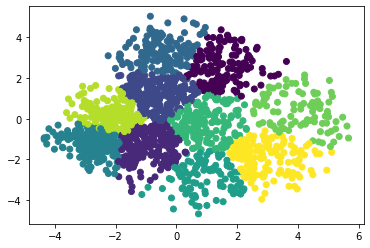

In [46]:
# Plot the predictions reduced data for visualization purposes 
rdata = Kmeans_c(10, 10,reduced_data)
predictc = rdata.predict(reduced_data)
#predict = best_model.predict(X)
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=predictc)
plt.savefig("Kmeans_Hanwritten.png")

In [48]:
# Arranging the 256 columns as a 16x16 matrix
x[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

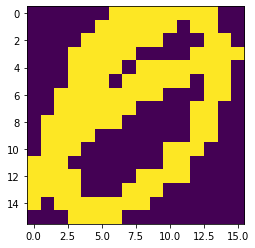

In [49]:
# Visualizing the 16x16 matrix as image
plt.imshow(x[0].reshape((16,16)))

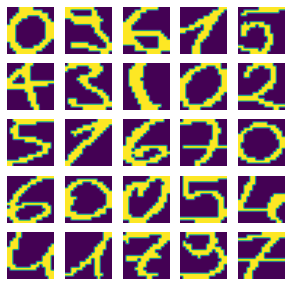

In [50]:
# Visualizing the Image data. Visualizing 25 images from the data as a 5x5 matrix
_, axarr = plt.subplots(5,5,figsize=(5,5))
for i in range(5):
    for j in range(5):
        # Per iteration in the loop, picking one row randomly to display in our 5x5 matrix
        axarr[i,j].imshow(x[np.random.randint(x.shape[0])].reshape((16,16)))          
        axarr[i,j].axis('off') #hiding the axis values for all the 25 images
        plt.savefig("Digits.png")

### For the last part of the question to see the labels that are ambiguous well, i believe that the usage of either Deep learning algorithms or classical machine learning will be necessary. In this case am going to use Deep learning to throw more light on some of these values. 


In [51]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [52]:
# Get the data
with open("semeion.data") as textFile:
    data = [line.split() for line in textFile]

In [53]:
# Just reconverted the original data into this way it was way easier operating in this mode 
data = np.asarray(data)
data = data.astype(float)

In [54]:
# The x values 
X = data[:,:-10]
print(X.shape)
X

(1593, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
# The y values 
y = data[:,-10:]
print(y.shape)
y

(1593, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [56]:
# Matrix as a 16 by 16 for an individual element
X[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

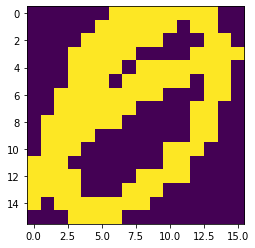

In [57]:
# Visualizing the 16x16 matrix as image
plt.imshow(X[0].reshape((16,16)))

In [58]:
# Data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [59]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))
my_optimizer = SGD(lr=0.1)
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 2s - loss: 2.2620 - accuracy: 0.1756 - val_loss: 2.1488 - val_accuracy: 0.1642
Epoch 2/60
25/25 - 0s - loss: 2.0324 - accuracy: 0.3359 - val_loss: 1.8988 - val_accuracy: 0.2627
Epoch 3/60
25/25 - 0s - loss: 1.7667 - accuracy: 0.5090 - val_loss: 1.6441 - val_accuracy: 0.5612
Epoch 4/60
25/25 - 0s - loss: 1.5434 - accuracy: 0.6538 - val_loss: 1.3976 - val_accuracy: 0.6657
Epoch 5/60
25/25 - 0s - loss: 1.3251 - accuracy: 0.7564 - val_loss: 1.2115 - val_accuracy: 0.7493
Epoch 6/60
25/25 - 0s - loss: 1.1542 - accuracy: 0.8051 - val_loss: 1.0520 - val_accuracy: 0.8209
Epoch 7/60
25/25 - 0s - loss: 1.0041 - accuracy: 0.8282 - val_loss: 0.9302 - val_accuracy: 0.8418
Epoch 8/60
25/25 - 0s - loss: 0.8882 - accuracy: 0.8551 - val_loss: 0.8259 - val_accuracy: 0.8746
Epoch 9/60
25/25 - 0s - loss: 0.7939 - accuracy: 0.8564 - val_loss: 0.7088 - val_accuracy: 0.8746
Epoch 10/60
25/25 - 0s - loss: 0.7159 - accuracy: 0.8641 - val_loss: 0.6397 - val_accuracy: 0.8896
Epoch 11/60
25/25 -

In [60]:
preds = np.argmax(y_pred, axis = 1)
preds

array([7, 3, 9, 4, 1, 0, 8, 4, 6, 7, 3, 4, 1, 3, 4, 3, 6, 3, 2, 9, 4, 5,
       7, 3, 7, 3, 3, 8, 9, 2, 5, 6, 8, 2, 6, 0, 4, 3, 5, 6, 0, 1, 4, 9,
       1, 2, 7, 2, 7, 4, 8, 2, 9, 4, 7, 9, 1, 6, 0, 1, 0, 0, 6, 9, 4, 1,
       3, 0, 8, 3, 7, 5, 4, 2, 0, 2, 4, 4, 1, 7, 4, 0, 2, 6, 2, 7, 2, 3,
       3, 8, 7, 3, 2, 3, 2, 0, 0, 9, 7, 2, 0, 4, 3, 9, 6, 9, 1, 4, 9, 4,
       2, 7, 0, 8, 9, 9, 9, 3, 8, 4, 1, 1, 8, 3, 0, 3, 3, 3, 2, 6, 3, 5,
       2, 5, 3, 9, 6, 1, 9, 0, 0, 0, 7, 9, 3, 2, 9, 9, 2, 6, 7, 3, 2, 1,
       3, 2, 3, 0, 0, 5, 9, 8, 5, 4, 0, 1, 1, 1, 5, 7, 5, 7, 2, 6, 1, 8,
       3, 9, 6, 4, 3, 9, 7, 0, 6, 2, 8, 3, 1, 2, 4, 5, 5, 1, 3, 8, 0, 0,
       6, 7, 9, 7, 2, 0, 8, 2, 6, 7, 7, 2, 3, 4, 3, 5, 2, 6, 5, 0, 3, 0,
       5, 0, 2, 4, 7, 2, 5, 0, 9, 5, 4, 9, 4, 3, 1, 6, 3, 9, 4, 3, 8, 8,
       1, 7, 9, 3, 3, 2, 6, 5, 5, 0, 7, 8, 5, 0, 4, 5, 8, 0, 8, 2, 5, 9,
       9, 3, 3, 3, 0, 1, 3, 6, 2, 5, 7, 8, 9, 3, 0, 6, 3, 1, 9, 0, 8, 0,
       3, 3, 3, 5, 4, 8, 7, 3, 1, 9, 6, 3, 2, 8, 5,

In [61]:
real_vals = np.argmax(y_test, axis = 1)
real_vals

array([7, 9, 9, 4, 1, 0, 8, 4, 6, 7, 9, 4, 1, 3, 4, 3, 6, 3, 2, 9, 4, 5,
       7, 3, 7, 3, 3, 8, 7, 2, 5, 6, 8, 8, 6, 0, 4, 3, 5, 6, 0, 1, 4, 9,
       1, 2, 7, 2, 7, 4, 8, 2, 9, 7, 7, 9, 1, 5, 0, 1, 0, 0, 6, 5, 4, 1,
       3, 0, 8, 3, 7, 5, 4, 2, 0, 0, 4, 4, 1, 7, 4, 0, 2, 6, 2, 5, 2, 1,
       5, 8, 7, 3, 2, 3, 2, 0, 0, 9, 7, 2, 0, 4, 3, 9, 6, 9, 1, 4, 9, 4,
       8, 7, 0, 0, 9, 8, 9, 3, 8, 4, 1, 4, 8, 3, 0, 3, 7, 5, 2, 6, 3, 5,
       8, 5, 3, 9, 6, 1, 9, 0, 0, 0, 7, 1, 3, 2, 9, 9, 2, 6, 7, 3, 2, 1,
       3, 2, 3, 8, 0, 5, 9, 8, 5, 4, 0, 1, 7, 1, 5, 7, 5, 7, 2, 6, 1, 8,
       3, 9, 6, 4, 3, 9, 7, 0, 6, 2, 8, 3, 1, 2, 4, 6, 5, 4, 3, 8, 0, 0,
       6, 7, 9, 7, 2, 0, 8, 2, 6, 7, 7, 1, 3, 4, 3, 5, 2, 6, 5, 0, 3, 0,
       5, 0, 2, 7, 7, 2, 5, 0, 9, 5, 4, 7, 6, 8, 3, 6, 9, 9, 4, 9, 8, 8,
       1, 7, 9, 3, 9, 8, 6, 0, 5, 0, 7, 8, 5, 0, 4, 3, 8, 0, 8, 2, 5, 9,
       9, 3, 3, 3, 0, 1, 3, 6, 2, 5, 7, 8, 9, 3, 0, 6, 3, 1, 9, 0, 8, 0,
       3, 3, 3, 5, 4, 8, 7, 3, 1, 9, 6, 3, 2, 8, 5,

In [62]:
#Getting the misclassified data by digits
misclassified = []
indices = []
most = [9,1,3]
nines = []
ones = []
tres = []
twos = []
for i, v in enumerate(preds):
    if (preds[i]!=real_vals[i]):
        misclassified.append(v)
        indices.append(i)
        if(v ==9):
            nines.append(i)
        if(v ==1):
            ones.append(i)
        if(v ==3):
            tres.append(i)
        if(v==2):
            twos.append(i)

In [65]:
# Misclassified numbers
np.array(misclassified)

array([3, 3, 9, 2, 4, 6, 9, 2, 7, 3, 3, 2, 8, 9, 1, 3, 3, 2, 9, 0, 1, 5,
       1, 2, 4, 9, 4, 3, 1, 3, 3, 3, 2, 5, 5, 1, 4, 1, 9, 8, 1, 4, 9, 9,
       8, 7, 9, 3, 0])

In [68]:
#Most misclassified numbers 
np.unique(np.array(misclassified), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 2,  7,  6, 11,  5,  3,  1,  2,  3,  9]))

In [69]:
np.array(indices)

array([  1,  10,  28,  33,  53,  57,  63,  75,  85,  87,  88, 110, 113,
       115, 121, 126, 127, 132, 143, 157, 166, 191, 193, 209, 223, 231,
       232, 233, 234, 236, 239, 246, 247, 249, 257, 308, 315, 327, 329,
       331, 362, 365, 382, 391, 402, 403, 429, 441, 477])

In [70]:
len(tres)

11

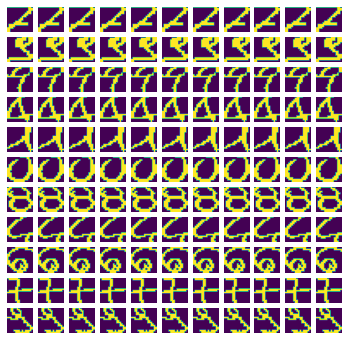

In [75]:
def vis_images(lis,size,data):
    _, axarr = plt.subplots(len(lis),len(lis),figsize=(size,size))
    for i in range(len(lis)):
        for j in range(len(lis)):
            axarr[i,j].imshow(data[i].reshape((16,16)))          
            axarr[i,j].axis('off')
            plt.savefig("threes.png")
            
vis_images(tres,6,X_test)

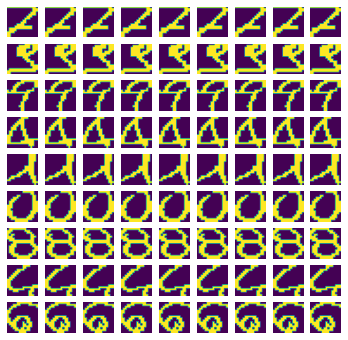

In [76]:
vis_images(nines,6,X_test)

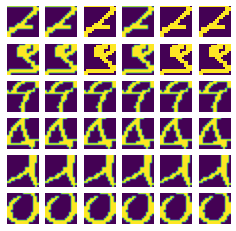

In [78]:
vis_images(twos,4,X_test)

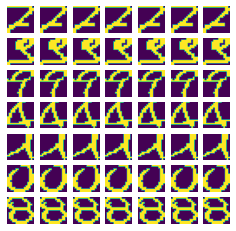

In [74]:
vis_images(ones,4,X_test)